<a href="https://colab.research.google.com/github/eskoviak/Collab_Notebooks/blob/main/factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

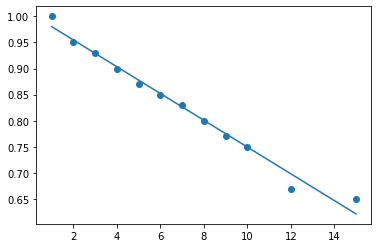

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

factors = pd.read_csv('factors.csv')

regr = linear_model.LinearRegression()
X = np.array(factors['reps']).reshape(-1,1)
regr.fit(X, factors['factor'])

#plt.scatter(X,factors['factor'])
#plt.plot(X, regr.predict(X))



In [ ]:
x_prime = np.array([4,4,4,4]).mean()
weight_mean = np.array([135,135,140,145]).mean()
ORM= weight_mean/regr.predict([[x_prime]])

In [ ]:

def tokenize(inStr):
    if inStr.find('+') > -1:
        return inStr.split('+')
    else:
        return [inStr]

def parseOperators(inStr):
    outList = []
    mode = 'tile'
    #inStr = inStr[0]

    if inStr.count('r') == 1:
        mode = 'repeat'
        inStr = inStr.replace('r','')

    inStr.replace('*','x')
    
    if inStr.count('x') == 0:
        # basic Set
        mult = 1
        set=inStr
    else:
        (mult, set) = inStr.split('x')

    # need to check to see if set has an operator embedded
    if set.count('-->') == 1:
        start, stop = set.split('-->')
        start = int(re.sub('\(','',start))
        stop = int(re.sub('\)','',stop))
        if stop < start:
            step = -1
            stop -= 1
        else:
            step = 1
            stop += 1
        set = np.arange(start, stop, step)
    else:
        # otherwise, evaluate set
        set = list(eval(set))

    if mode == 'tile':
        outList= np.tile(set, int(mult))
    elif mode == 'repeat':
        outList = np.repeat(set, int(mult))

    return outList


In [ ]:
for cadence in ['4x(5,)']:
    list_cadence = []
    for token in tokenize(cadence):
        #print(token)
        #print(parseOperators(token))
        list_cadence.extend(parseOperators(token))
    #tokens = tokenize(cadence)
    #print(tokens)
    #print(parseOperators(tokens))
    #print(f"In: {cadence}\t Out: {list_cadence}")

In [ ]:
for weights in ['2x(135,)+(140,)+(145,)']:
    list_weights = []
    for token in tokenize(weights):
        list_weights.extend(parseOperators(token))
    

In [ ]:
one_rep_max = np.array(list_weights).mean()/regr.predict(np.array(list_cadence).mean().reshape(1,-1))